# 6 - Shapley Values

## 6.1 - Importação das Bibliotecas

In [ ]:
#pip install shap

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
import shap

## 6.2 - Shapley Values - Conceito
Neste módulo, vamos falar sobre Shapley Values, que é uma técnica importante para interpretar modelos de Machine Learning. Shapley Values quantifica a contribuição de cada variável na previsão de um modelo, tanto individualmente quanto em conjunto. Ele é calculado com base na teoria dos jogos e permite que os cientistas de dados entendam como cada variável influencia as previsões do modelo. Isso é útil para identificar padrões e melhorar o modelo. Vamos ver mais detalhes no código.

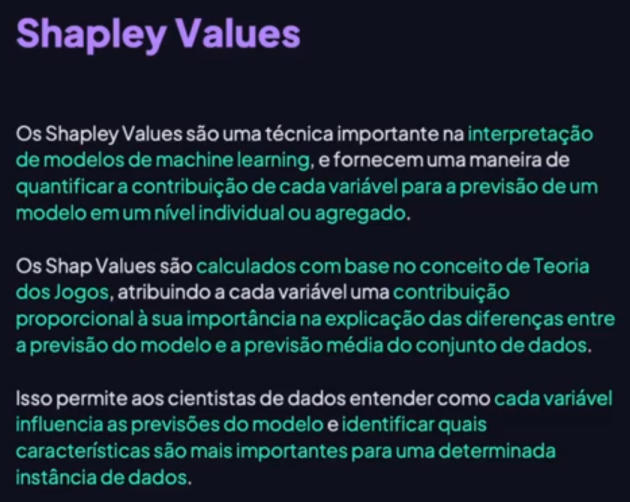

## 6.3 - Shapley Values - Regressão
Nesta aula, vamos aprender sobre uma técnica chamada Shapley Values, que nos permite interpretar os modelos que estamos desenvolvendo. Vamos usar o Shapley Values para medir a importância e contribuição de cada variável em nosso modelo. Vamos mostrar como aplicar essa técnica em um conjunto de dados usando o pandas, shap, matplotlib e sklearn. Vamos treinar um modelo de regressão linear e logistic regression, dividir os dados em treino e teste, e em seguida, aplicar o Shapley Values para interpretar os resultados. Vamos mostrar como plotar gráficos de barras, waterfall, heatmap e beeswarm para visualizar a contribuição das variáveis em diferentes instâncias do conjunto de testes. Essa técnica nos ajuda a entender como cada variável influencia o modelo e pode ser útil para interpretar os resultados de regressão e classificação.

In [5]:
# Carregar dataset
df = pd.read_csv('dataset_colesterol.csv')
df.head()

,Id,Grupo Sanguíneo,Fumante,Nível de Atividade,Idade,Peso,Altura,Colesterol
0,1,B,Sim,Baixo,33.0,85.1,186.0,199.63
1,2,A,Não,Moderado,68.0,105.0,184.0,236.98
2,3,O,Não,Alto,25.0,64.8,180.0,161.79
3,4,A,Não,Alto,43.0,120.2,167.0,336.24
4,5,AB,Não,Baixo,79.0,88.5,175.0,226.23


In [6]:
# Tratar Nulo

# Coletar medidas das variáveis categóricas (Moda)
moda_grupo_sang = df['Grupo Sanguíneo'].mode()
moda_fumante = df['Fumante'].mode()
moda_nivel_atividade = df['Nível de Atividade'].mode()

In [7]:
# Coletar medidas das variáveis numéricas (Mediana)
mediana_idade = df.Idade.median()
mediana_peso = df.Peso.median()
mediana_altura = df.Altura.median()

In [8]:
# Imputar quando valores são ausentes
# A moda pode resultar em mais de um valor, por isso pegar a primeira que está no índice 0
df.fillna(value={'Grupo Sanguíneo': moda_grupo_sang[0],
                                'Fumante': moda_fumante[0],
                                'Nível de Atividade': moda_nivel_atividade[0],
                                'Idade': mediana_idade,
                                'Peso': mediana_peso,
                                'Altura': mediana_altura}, inplace=True)

In [9]:
# ajustar Data Frame
df.drop('Id', axis=1, inplace=True)

In [10]:
# Aplicar o OneHotEncoder
df = pd.get_dummies(df, columns=['Grupo Sanguíneo', 'Fumante', 'Nível de Atividade'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Idade                        1000 non-null   float64
 1   Peso                         1000 non-null   float64
 2   Altura                       1000 non-null   float64
 3   Colesterol                   1000 non-null   float64
 4   Grupo Sanguíneo_A            1000 non-null   uint8  
 5   Grupo Sanguíneo_AB           1000 non-null   uint8  
 6   Grupo Sanguíneo_B            1000 non-null   uint8  
 7   Grupo Sanguíneo_O            1000 non-null   uint8  
 8   Fumante_Não                  1000 non-null   uint8  
 9   Fumante_Sim                  1000 non-null   uint8  
 10  Nível de Atividade_Alto      1000 non-null   uint8  
 11  Nível de Atividade_Baixo     1000 non-null   uint8  
 12  Nível de Atividade_Moderado  1000 non-null   uint8  
dtypes: float64(4), uint

### 6.3.1 - Treinar Modelo de Regressão Linear

In [12]:
# Separar X e y
X = df.drop('Colesterol', axis=1)
y = df.Colesterol

In [13]:
# Separar treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=51)

In [14]:
model_reg = LinearRegression()
model_reg.fit(X_train, y_train)

LinearRegression()

### 6.3.2 - Plotar Shapley Values - Regressão

In [15]:
# Rodar o Explainer no conjunto de treinamento
explainer_reg = shap.Explainer(model_reg.predict, X_train)

In [16]:
# Calcular Shap Values no conjunto de Testes
shap_values_reg = explainer_reg(X_test)

PermutationExplainer explainer: 301it [00:10,  2.73it/s]                         


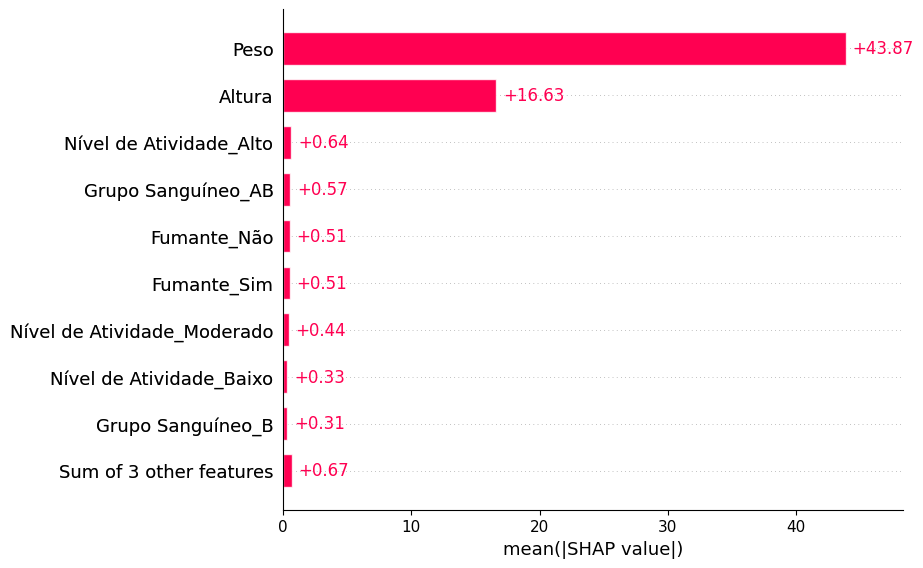

In [17]:
# Plotar a contribuição geral por Shap Values
shap.plots.bar(shap_values_reg)

In [18]:
# Mostrar primeira instância do conjunto de testes
X_test.iloc[0,:]

Idade                           29.0
Peso                            87.8
Altura                         179.0
Grupo Sanguíneo_A                0.0
Grupo Sanguíneo_AB               1.0
Grupo Sanguíneo_B                0.0
Grupo Sanguíneo_O                0.0
Fumante_Não                      1.0
Fumante_Sim                      0.0
Nível de Atividade_Alto          0.0
Nível de Atividade_Baixo         1.0
Nível de Atividade_Moderado      0.0
Name: 833, dtype: float64

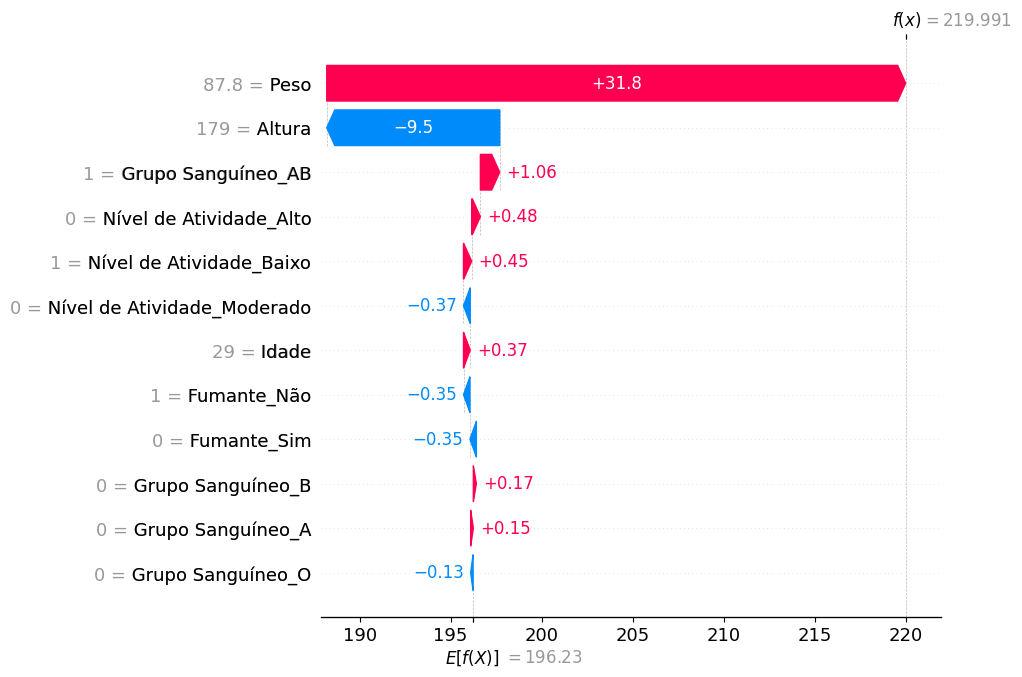

In [19]:
# Plotar Shap Values para um paciente específico
shap.plots.waterfall(shap_values_reg[0], max_display=13)

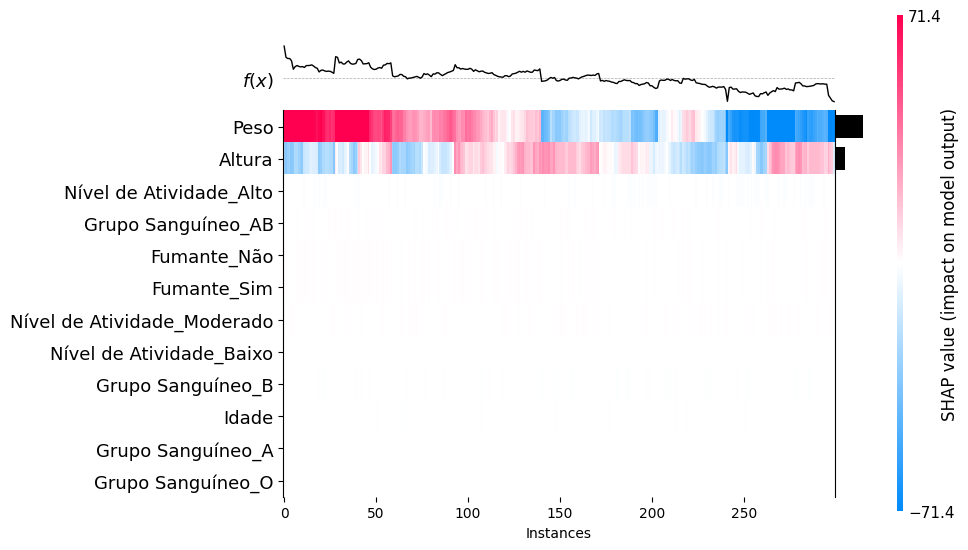

In [20]:
# Plotar Heatmap Geral
shap.plots.heatmap(shap_values_reg, max_display=13)

## 6.4 - Shapley Values - Classificação
Neste vídeo, vamos aplicar o conceito de Shapley Values a um modelo de classificação. Vamos treinar um modelo de regressão logística e, em seguida, usar o Explainer Class para analisar as contribuições das variáveis para as previsões do modelo. Veremos que o tamanho é a variável que mais contribui, seguida pela doçura e suculência. Também analisaremos a contribuição de cada variável para uma instância específica do conjunto de testes. Utilizaremos gráficos como o Feature Importance, Hitmap e Bee Swarm para visualizar essas contribuições. Com isso, concluímos mais um módulo prático sobre Shapley Values.

In [31]:
# Carregar Dataset
df2 = pd.read_csv('./fruit_quality.csv')
df2.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,good
1,1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good
2,2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad
3,3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good
4,4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good


In [32]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   int64  
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   float64
 8   Quality      4000 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 281.4+ KB


In [33]:
# Ajustar Data Frame

# Remover Coluna A_id, pois não tem poder preditivo
df2.drop(columns=['A_id'], axis=1, inplace=True)

# Tranformar a variável Quality em numérica (0 e 1)
# Convertendo pra int True se torna 1 e False 0
df2.Quality = (df2.Quality == 'good').astype(int)
df2

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,1
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,1
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,0
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,1
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,1
...,...,...,...,...,...,...,...,...
3995,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784,0
3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235,1
3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611,0
3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229720,1


### 6.4.1 - Treinar Modelo de Classificação

In [34]:
# Treinar o modelo usando RFE

# Separar X e y
X = df2.drop('Quality', axis=1)
y = df2.Quality

In [35]:
# Separar treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=51)

In [36]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

LogisticRegression()

### 6.4.2 - Plotar Shapley Values - Classificação

In [37]:
# Rodar o Explainer no conjunto de treinamento
explainer_class = shap.Explainer(model_lr.predict, X_train)

In [38]:
# Calcular Shap Values no conjunto de Testes
shap_values_class = explainer_class(X_test)

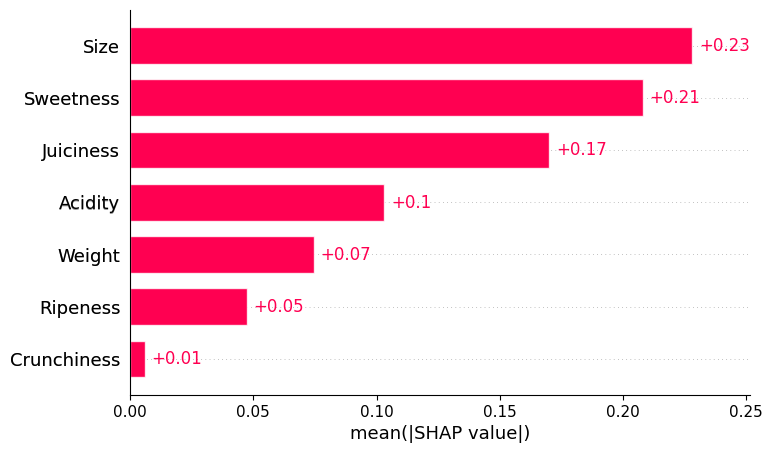

In [39]:
# Plotar a contribuição geral por Shap Values
shap.plots.bar(shap_values_class)

In [40]:
# Mostrar primeira instância do conjunto de testes
X_test.iloc[0,:]

Size           1.819744
Weight        -1.174086
Sweetness     -2.772288
Crunchiness   -0.039636
Juiciness     -1.437848
Ripeness       1.648811
Acidity       -1.098697
Name: 1150, dtype: float64

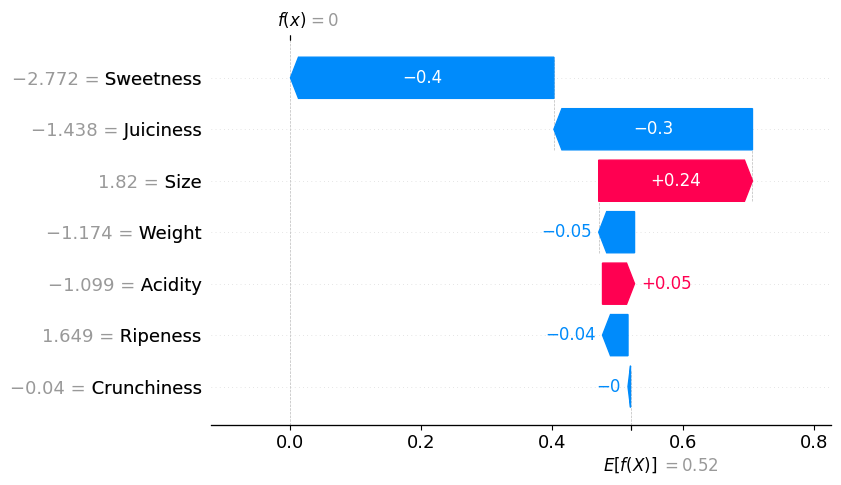

In [41]:
# Plotar Shap Values para um paciente específico
shap.plots.waterfall(shap_values_class[0], max_display=13)

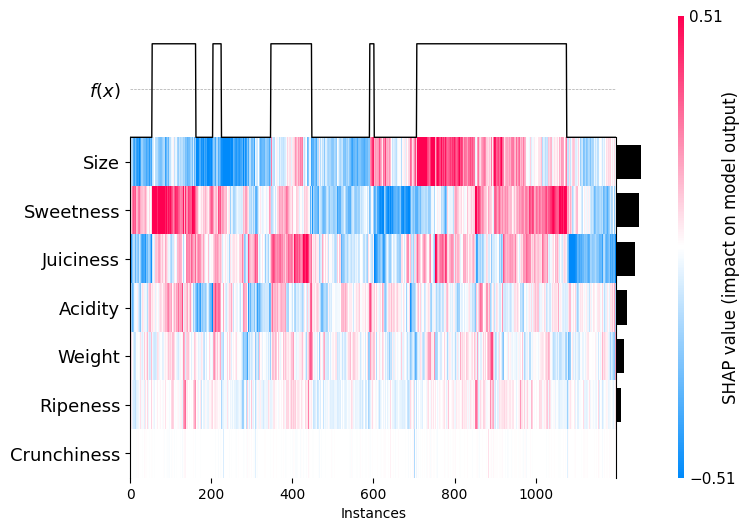

In [42]:
# Plotar Heatmap Geral
shap.plots.heatmap(shap_values_class, max_display=13)

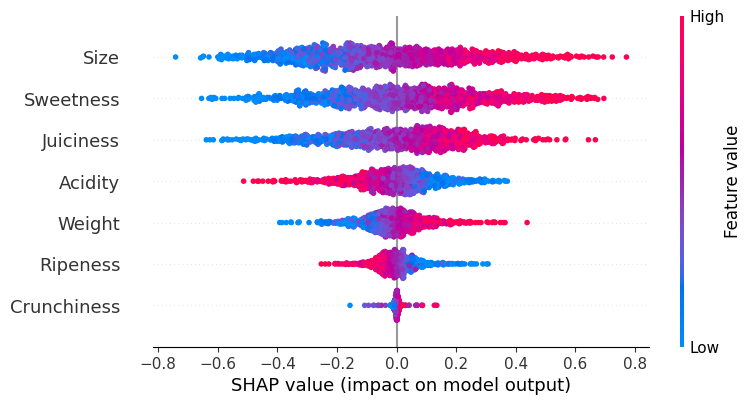

In [43]:
# Plotar Beewswarm Geral
shap.plots.beeswarm(shap_values_class, max_display=13)